In [1]:
import os
from pathlib import Path
from keras.preprocessing import image
import matplotlib.pyplot as plt


Using TensorFlow backend.


In [2]:
p = Path(r"E:\pkmn")

dirs = p.glob("*")


image_data = []
labels = []
labels_dict={"Bulbasaur":0,"Cloyster":1,"Ditto":2,"Dodrio":3,"Dragonite":4}
for folder_dir in dirs:
    label = str(folder_dir).split("\\")[-1]
    cnt = 0
    print(folder_dir)
    for img_path in folder_dir.glob("*.jpg"):
        img = image.load_img(img_path,target_size=(40,40))
        img_array = image.img_to_array(img)
        image_data.append(img_array)
        labels.append(labels_dict[label])
        
        cnt += 1
        
    print(cnt)

E:\pkmn\Bulbasaur
176
E:\pkmn\Cloyster
59
E:\pkmn\Ditto
48
E:\pkmn\Dodrio
65
E:\pkmn\Dragonite
62


In [3]:
import numpy as np
label2pokemon={0:"Bulbasaur",1:"Cloyster",2:"Ditto",3:"Dodrio",4:"Dragonite"}

In [4]:
X=np.array(image_data)

In [5]:
Y=np.array(labels)

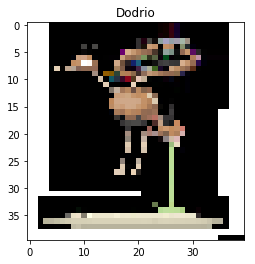

In [8]:
plt.imshow(X[60])
plt.title(label2pokemon[Y[60]])
plt.show()

In [9]:
import random
random.seed(10)
X = np.array(image_data)
Y = np.array(labels)


from sklearn.utils import shuffle
X,Y = shuffle(X,Y,random_state=2)
X = X/255.0

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,Y,random_state=2,test_size=0.2)

In [12]:
Xtest.shape

(82, 40, 40, 3)

Text(0.5, 1.0, 'Dragonite')

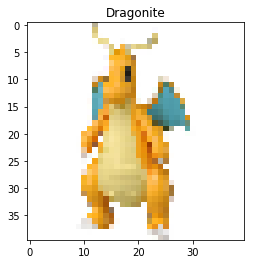

In [13]:
plt.imshow(Xtest[10])
plt.title(label2pokemon[Ytest[10]])

In [14]:
X = X.reshape(X.shape[0],-1)
print(X.shape)

Xtest = Xtest.reshape(Xtest.shape[0],-1)
print(Xtest.shape)

(410, 4800)
(82, 4800)


In [20]:
class NeuralNetwork:
    
    def __init__(self,input_size,layers,output_size):
        np.random.seed(0)
        
        model = {} #Dictionary
        
        #First Layer
        model['W1'] = np.random.randn(input_size,layers[0])
        model['b1'] = np.zeros((1,layers[0]))
        
        #Second Layer
        model['W2'] = np.random.randn(layers[0],layers[1])
        model['b2'] = np.zeros((1,layers[1]))
        
        #Third/Output Layer
        model['W3'] = np.random.randn(layers[1],output_size)
        model['b3'] = np.zeros((1,output_size))
        
        self.model = model
        self.activation_outputs = None
    
    def forward(self,x):
        
        W1,W2,W3 = self.model['W1'],self.model['W2'],self.model['W3']
        b1, b2, b3 = self.model['b1'],self.model['b2'],self.model['b3']
        
        z1 = np.dot(x,W1) + b1
        a1 = np.tanh(z1) 
        
        z2 = np.dot(a1,W2) + b2
        a2 = np.tanh(z2)
        
        z3 = np.dot(a2,W3) + b3
        y_ = softmax(z3)
        
        self.activation_outputs = (a1,a2,y_)
        return y_
        
    def backward(self,x,y,learning_rate=0.001):
        W1,W2,W3 = self.model['W1'],self.model['W2'],self.model['W3']
        b1, b2, b3 = self.model['b1'],self.model['b2'],self.model['b3']
        m = x.shape[0]
        
        a1,a2,y_ = self.activation_outputs
        
        delta3 = y_ - y
        dw3 = np.dot(a2.T,delta3)
        db3 = np.sum(delta3,axis=0)
        
        delta2 = (1-np.square(a2))*np.dot(delta3,W3.T)
        dw2 = np.dot(a1.T,delta2)
        db2 = np.sum(delta2,axis=0)
        
        delta1 = (1-np.square(a1))*np.dot(delta2,W2.T)
        dw1 = np.dot(X.T,delta1)
        db1 = np.sum(delta1,axis=0)
        
        
        #Update the Model Parameters using Gradient Descent
        self.model["W1"]  -= learning_rate*dw1
        self.model['b1']  -= learning_rate*db1
        
        self.model["W2"]  -= learning_rate*dw2
        self.model['b2']  -= learning_rate*db2
        
        self.model["W3"]  -= learning_rate*dw3
        self.model['b3']  -= learning_rate*db3
    def predict(self,x):
        y_out = self.forward(x)
        return np.argmax(y_out,axis=1)
    
    def summary(self):
        W1,W2,W3 = self.model['W1'],self.model['W2'],self.model['W3']
        a1,a2,y_ = self.activation_outputs
        
        print("W1 ",W1.shape)
        print("A1 ",a1.shape)
def softmax(a):
    e_pa = np.exp(a) #Vector
    ans = e_pa/np.sum(e_pa,axis=1,keepdims=True)
    return ans


        

In [21]:
def loss(y_oht,p):
    l = -np.mean(y_oht*np.log(p))
    return l

def one_hot(y,depth):
    
    m = y.shape[0]
    y_oht = np.zeros((m,depth))
    y_oht[np.arange(m),y] = 1
    return y_oht

In [17]:
def train(X,Y,model,epochs,learning_rate,logs=True):
    training_loss = []
    
    classes = 5
    Y_OHT = one_hot(Y,classes)
    for ix in range(epochs):
        Y_ = model.forward(X)
        l = loss(Y_OHT,Y_)
        
        model.backward(X,Y_OHT,learning_rate)
        training_loss.append(l)
        
    return training_loss

In [18]:
model = NeuralNetwork(input_size=4800,layers=[100,50],output_size=5)

In [19]:
l = train(X,Y,model,500,0.0002)

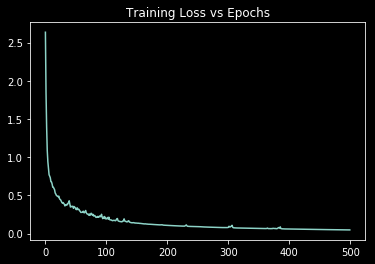

In [22]:
plt.style.use("dark_background")
plt.title("Training Loss vs Epochs")
plt.plot(l)

plt.show()

In [23]:
def getAccuracy(X,Y,model):
    outputs = model.predict(X)
    acc = np.sum(outputs==Y)/Y.shape[0]
    return acc
    
print("Train Acc %.4f"%getAccuracy(X,Y,model))
print("Test Acc %.4f"%getAccuracy(Xtest,Ytest,model))

Train Acc 0.9488
Test Acc 0.9634


In [25]:
outputs=model.predict(X)
outputs1=model.predict(Xtest)

In [202]:
from sklearn.metrics import classification_report


In [203]:
print(classification_report(outputs,Y))

              precision    recall  f1-score   support

           0       0.99      0.94      0.96       185
           1       0.92      0.95      0.93        57
           2       0.92      0.96      0.94        46
           3       0.89      0.97      0.93        60
           4       0.95      0.95      0.95        62

   micro avg       0.95      0.95      0.95       410
   macro avg       0.93      0.95      0.94       410
weighted avg       0.95      0.95      0.95       410



In [204]:
from sklearn.metrics import confusion_matrix
cnf_mtr=confusion_matrix(outputs,Y)

In [205]:
cnf_mtr

array([[174,   2,   3,   3,   3],
       [  0,  54,   1,   2,   0],
       [  0,   2,  44,   0,   0],
       [  2,   0,   0,  58,   0],
       [  0,   1,   0,   2,  59]], dtype=int64)

In [26]:
outputs1

array([1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 4, 4, 3, 3, 3, 0, 0, 0, 2, 0, 2, 3,
       2, 1, 0, 1, 2, 2, 0, 0, 0, 3, 0, 2, 0, 3, 2, 1, 0, 0, 0, 4, 4, 2,
       0, 0, 0, 3, 1, 0, 3, 1, 3, 3, 0, 0, 1, 1, 0, 3, 0, 0, 4, 4, 0, 0,
       4, 0, 1, 0, 0, 0, 1, 3, 2, 4, 0, 3, 4, 0, 4, 3], dtype=int64)

In [29]:
i=0
while(outputs[i])

array([1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 4, 4, 3, 3, 3, 0, 0, 0, 2, 0, 2, 3,
       2, 1, 0, 1, 2, 2, 0, 0, 0, 3, 0, 2, 0, 3, 2, 1, 0, 0, 0, 4, 4, 2,
       0, 0, 0, 3, 1, 0, 3, 1, 3, 3, 0, 0, 1, 1, 0, 3, 0, 0, 4, 4, 0, 0,
       4, 0, 1, 0, 0, 0, 1, 3, 2, 4, 0, 3, 4, 0, 4, 3], dtype=int64)